## 因子绩效

1. 读取本地数据
2. 因子绩效
3. 图表展示
4. 信号表格

## 1_读取本地数据

In [1]:
import jaqs_fxdayu
jaqs_fxdayu.patch_all()
from jaqs.data import DataView
from jaqs.data import RemoteDataService
import os
import numpy as np
import warnings

warnings.filterwarnings("ignore")

D:\Anaconda3\lib\importlib\__init__.py:126: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return _bootstrap._gcd_import(name[level:], package, level)
D:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
dv = DataView()
dataview_folder = './JAQS_Data/hs300'
dv.load_dataview(dataview_folder)

Dataview loaded successfully.


## 2_因子绩效
例子以roe_pb为因子

In [3]:
factor = dv.get_ts('roe_pb')

In [4]:
print(factor.tail())

symbol      000001.SZ  000002.SZ  000008.SZ  000009.SZ  000012.SZ  000021.SZ  \
trade_date                                                                     
20171218     8.249819   3.575212   0.519206   1.180722   3.743906   3.493466   
20171219     7.920744   3.489389   0.513719   1.182345   3.734850   3.446718   
20171220     7.932463   3.557685   0.513118   1.198933   3.794593   3.468159   
20171221     7.768837   3.423666   0.516137   1.205692   3.757653   3.397795   
20171222     7.780111   3.408674   0.513719   1.184008   3.725679   3.425540   

symbol      000024.SZ  000027.SZ  000031.SZ  000039.SZ    ...      601998.SH  \
trade_date                                                ...                  
20171218          NaN   3.398461   3.693651   2.192838    ...      10.785439   
20171219          NaN   3.387159   3.693651   2.033817    ...      10.681325   
20171220          NaN   3.398461   3.693651   2.053398    ...      10.681325   
20171221          NaN   3.392801   3.69

In [5]:
mask = dv.get_ts('mask_index_member')
can_enter = dv.get_ts('can_enter')
can_exit = dv.get_ts('can_exit')
price = dv.get_ts('close_adj')
group = dv.get_ts('group')

In [6]:
print(can_enter.shape)
print(group.shape)

(1452, 539)
(1452, 539)


In [7]:
import matplotlib.pyplot as plt
from jaqs.research import SignalDigger
import warnings

def cal_obj(signal, name, period, quantile):
    obj = SignalDigger()
    obj.process_signal_before_analysis(signal,
                                   price=price,
                                   n_quantiles=quantile, period=period,
                                   can_enter = can_enter,
                                   can_exit = can_exit,
                                   group=group,
                                   mask=mask
                                   )
    obj.create_full_report()
    return obj

def plot_pfm(signal, name, period=5, quantile=5):
    obj = cal_obj(signal, name, period, quantile)
    plt.show()

def signal_data(signal, name, period=5, quantile=5):
    obj = cal_obj(signal, name, period, quantile)
    return obj.signal_data

## 画图展示

Nan Data Count (should be zero) : 140134;  Percentage of effective data: 53%


Value of signals of Different Quantiles Statistics
                min        max      mean       std  count    count %
quantile                                                            
1        -38.953244   2.457133 -0.227409  2.245474  83341  20.142645
2          0.098278   4.253156  1.423501  0.819109  82753  20.000532
3          0.323686   6.354052  2.397375  1.274478  82749  19.999565
4          0.635643   9.793076  3.746280  1.958750  82753  20.000532
5          1.129167  30.049557  7.479783  4.168038  82158  19.856726
Figure saved: E:\QTC\PythonQTC\course\3_JAQS\returns_report.pdf
Information Analysis
                ic
IC Mean      0.036
IC Std.      0.193
t-stat(IC)   7.122
p-value(IC)  0.000
IC Skew      0.036
IC Kurtosis -0.300
Ann. IR      0.187
Figure saved: E:\QTC\PythonQTC\course\3_JAQS\information_report.pdf


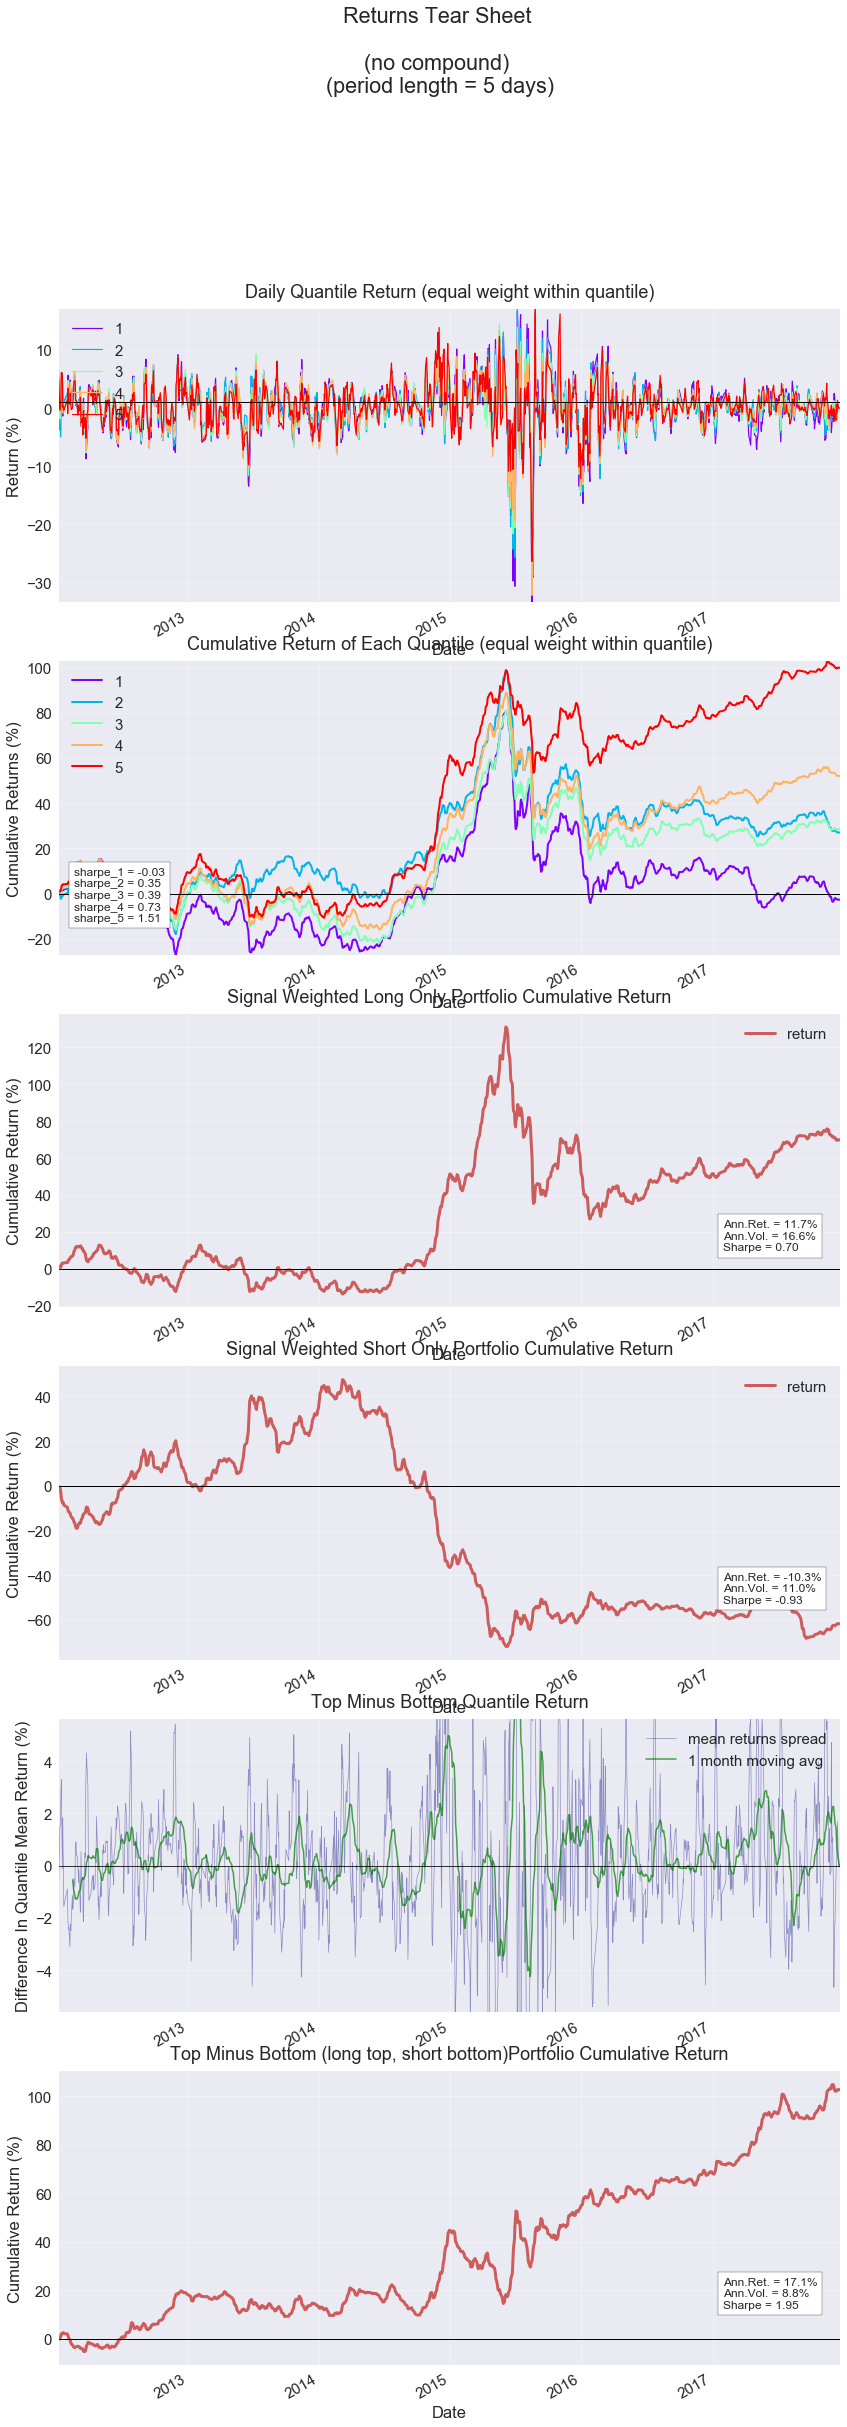

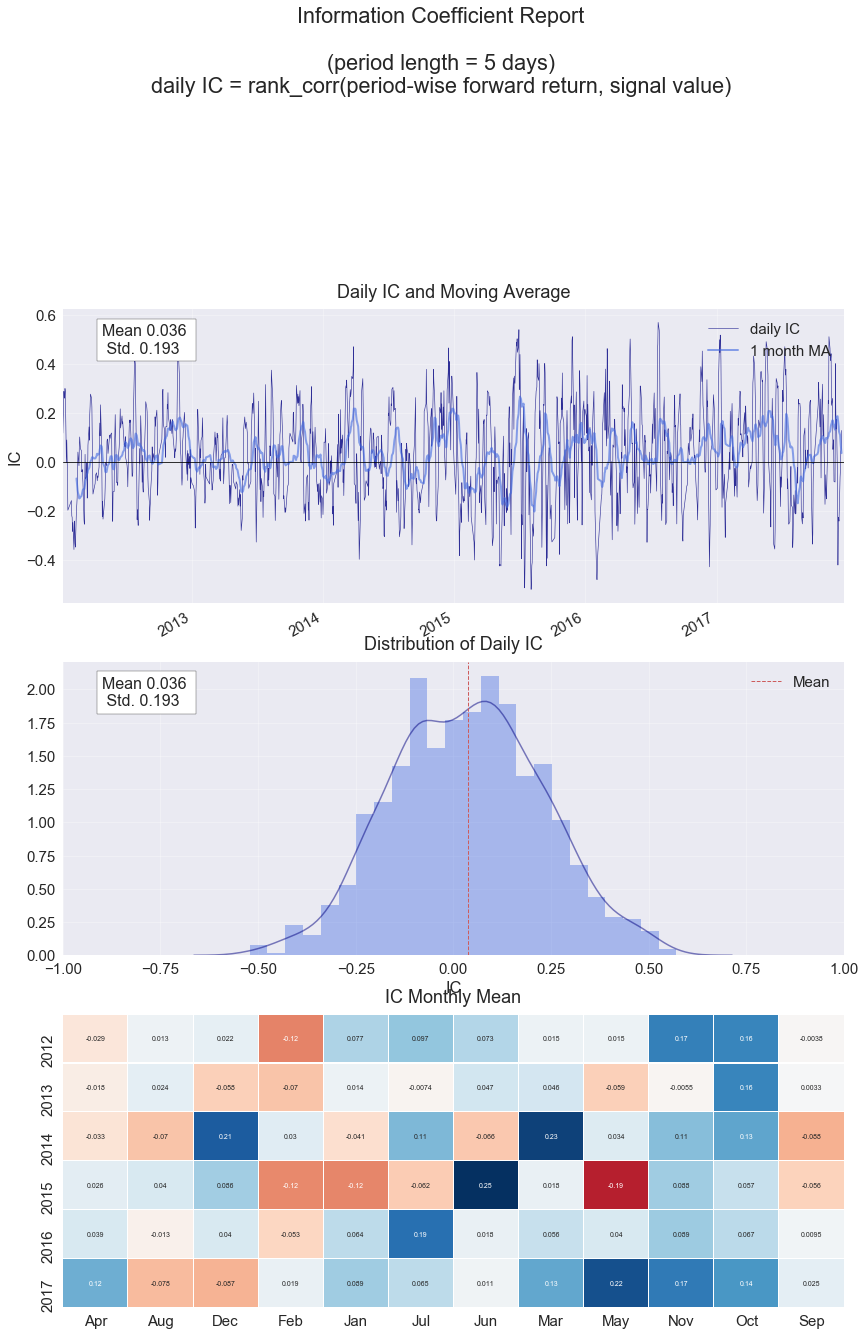

In [8]:
plot_pfm(factor, 'roe_pb', period=5, quantile=5)

## 信号表格

In [9]:
signal_df = signal_data(factor, 'roe_pb')

Nan Data Count (should be zero) : 140134;  Percentage of effective data: 53%


Value of signals of Different Quantiles Statistics
                min        max      mean       std  count    count %
quantile                                                            
1        -38.953244   2.457133 -0.227409  2.245474  83341  20.142645
2          0.098278   4.253156  1.423501  0.819109  82753  20.000532
3          0.323686   6.354052  2.397375  1.274478  82749  19.999565
4          0.635643   9.793076  3.746280  1.958750  82753  20.000532
5          1.129167  30.049557  7.479783  4.168038  82158  19.856726
Figure saved: E:\QTC\PythonQTC\course\3_JAQS\returns_report.pdf
Information Analysis
                ic
IC Mean      0.036
IC Std.      0.193
t-stat(IC)   7.122
p-value(IC)  0.000
IC Skew      0.036
IC Kurtosis -0.300
Ann. IR      0.187
Figure saved: E:\QTC\PythonQTC\course\3_JAQS\information_report.pdf


In [10]:
print(signal_df.tail())

                        signal  return group  quantile
trade_date symbol                                     
20171222   603160.SH  1.821410     0.0    电子         2
           603799.SH  2.473720     0.0  有色金属         2
           603833.SH  2.505306     0.0  轻工制造         2
           603858.SH  3.263219     0.0  医药生物         3
           603993.SH  1.521149     0.0  有色金属         1


In [11]:
Q5 = signal_df.signal[signal_df['quantile']==5]

In [12]:
Q5[Q5>0]=1

In [13]:
dv.append_df(Q5.unstack(),'roe_pb_Q5')

Field [roe_pb_Q5] is overwritten.


In [14]:
dv.save_dataview('./JAQS_Data/hs300')


Store data...
Dataview has been successfully saved to:
E:\QTC\PythonQTC\course\3_JAQS\JAQS_Data\hs300

You can load it with load_dataview('E:\QTC\PythonQTC\course\3_JAQS\JAQS_Data\hs300')


In [15]:
print(dv.get_ts('roe_pb_Q5').tail())

symbol      000001.SZ  000002.SZ  000008.SZ  000009.SZ  000012.SZ  000021.SZ  \
trade_date                                                                     
20171218          1.0        NaN        NaN        NaN        NaN        NaN   
20171219          1.0        NaN        NaN        NaN        NaN        NaN   
20171220          1.0        NaN        NaN        NaN        NaN        NaN   
20171221          1.0        NaN        NaN        NaN        NaN        NaN   
20171222          1.0        NaN        NaN        NaN        NaN        NaN   

symbol      000024.SZ  000027.SZ  000031.SZ  000039.SZ    ...      601998.SH  \
trade_date                                                ...                  
20171218          NaN        NaN        NaN        NaN    ...            1.0   
20171219          NaN        NaN        NaN        NaN    ...            1.0   
20171220          NaN        NaN        NaN        NaN    ...            1.0   
20171221          NaN        NaN       